In [37]:
import csv
import numpy as np
import matplotlib.pyplot as plt
temp_data = ''
with open('ca1_data/enrolment-by-institutions.csv', 'r') as fileR, open('ca1_data/temp_file.csv', 'w') as fileW:
    fileW.write(fileR.read().replace('-', '0'))
with open('ca1_data/enrolment-pre-university-by-level-and-course.csv', 'r') as fileR, open('ca1_data/temp_file2.csv', 'w') as fileW:
   for row in csv.reader(fileR, delimiter=','):
       row[4] = row[4].replace('-', '0')
       csv.writer(fileW, delimiter=',').writerow(row)
enrolmentinstitutions = np.genfromtxt(
                'ca1_data/temp_file.csv',
                dtype=['i2', 'U50', 'int32', 'int32', 'int32', 'int32', 'int32', 'int32', 'int32', 'int32', 'int32', 'int32', 'int32', 'int32', 'int32', 'int32', 'int32', 'int32', 'int32'],
                delimiter=',',
                names=True)
enrolmentpreu = np.genfromtxt(
                'ca1_data/temp_file2.csv',
                dtype=['i2', 'U50', 'U50', 'U50', 'int32'],
                delimiter=',',
                names=True)
enrolmentsecondary = np.genfromtxt(
                'ca1_data/enrolment-secondary-by-level-and-course.csv',
                dtype=['i2', 'U50', 'U50', 'U50', 'int32'],
                delimiter=',',
                names=True)
def data_year_filter(_file, _filter, _data):
    data = []
    for i in range(len(_filter)):
        row = []
        for j in range(21):
            row.append(
                _file[
                    (_file['year'] == j + 2000) &
                    (_filter[i])
                ][_data].sum())
        data.append(row)
    return data
def diff_datarowcol(_data1, _data2):
    data = []
    for i in range(21):
        data.append(_data1[i] - _data2[i])
    return data
def datacount_year_filter(_file, _data):
    data = []
    for i in range(len(_data)):
        row = []
        for j in range(21):
            row.append(
                _file[
                    (_file['year'] == j + 2000)
                ][_data[i]].sum())
        data.append(row)
    return data
def findsum_datarow(_data, _customCount1, _customCount2):
    if (_customCount1 or _customCount2):
        data = []
        for i in range(_customCount1):
            sum = 0
            for j in range(_customCount2):
                sum += _data[j][i]
            data.append(sum)
    else:
        data = []
        for i in range(21):
            sum = 0
            for j in range(len(_data)):
                sum += _data[j][i]
            data.append(sum)
    return data
def filter5years(_data):
    data = []
    if (isinstance(_data[0], list)):
        for i in range(len(_data)):
            data.append([])
            data[i] = np.ndarray.tolist(
                np.array(_data[i])[np.r_[0, 5, 10, 15, -1]])
    else:
        data = np.ndarray.tolist(np.array(_data)[np.r_[0, 5, 10, 15, -1]])
    return data
print('Purpose: Find out the trend of post-secondary student further their studies')
print('*** Data collection ***\nAll data starts from 2000 to 2020 to have a cleaner approach on data presentation')
print('--------------------------------------------------------------------------------------------------')
print('-- filename: enrolmentpreu:')
print(f'-- Keys: {np.dtype(enrolmentpreu[0]).names}')
print(f'-- Rows: {len(enrolmentpreu)}')
print(f'-- Range (year): {min(enrolmentpreu["year"])} to {max(enrolmentpreu["year"])}')
print(f'-- Range (enrolmentpreu): {min(enrolmentpreu["enrolment_preu"])} to {max(enrolmentpreu["enrolment_preu"])}')
print(f'-- Type (level): {np.unique(enrolmentpreu["level"])}')
print(f'-- Type (course): {np.unique(enrolmentpreu["course"])}')
print('--------------------------------------------------------------------------------------------------')
print('-- filename: enrolmentsecondary:')
print(f'-- Keys: {np.dtype(enrolmentsecondary[0]).names}')
print(f'-- Rows: {len(enrolmentsecondary)}')
print(f'-- Range (year): {min(enrolmentsecondary["year"])} to {max(enrolmentsecondary["year"])}')
print(f'-- Range (enrolment_secondary): {min(enrolmentsecondary["enrolment_secondary"])} to {max(enrolmentsecondary["enrolment_secondary"])}')
print(f'-- Type (level): {np.unique(enrolmentsecondary["level"])}')
print(f'-- Type (course): {np.unique(enrolmentsecondary["course"])}')
print('[Secondary 1, Secondary 2, Secondary 3] keys will be ignored as we are covering on graduating secondary students')
print('[Special] key will be ignored as it is assumed to be a course that deviates from the usual post-secondary path')
print('--------------------------------------------------------------------------------------------------')
print('-- filename: enrolmentinstitutions:')
print(f'-- Keys: {np.dtype(enrolmentinstitutions[0]).names}')
print(f'-- Rows: {len(enrolmentinstitutions)}')
print(f'-- Range (year): {min(enrolmentinstitutions["year"])} to {max(enrolmentinstitutions["year"])}')
print(f'-- Range (nus): {min(enrolmentinstitutions["nus"])} to {max(enrolmentinstitutions["nus"])}')
print(f'-- Range (ntu): {min(enrolmentinstitutions["ntu"])} to {max(enrolmentinstitutions["ntu"])}')
print(f'-- Range (smu): {min(enrolmentinstitutions["smu"])} to {max(enrolmentinstitutions["smu"])}')
print(f'-- Range (sit): {min(enrolmentinstitutions["sit"])} to {max(enrolmentinstitutions["sit"])}')
print(f'-- Range (sutd): {min(enrolmentinstitutions["sutd"])} to {max(enrolmentinstitutions["sutd"])}')
print(f'-- Range (suss): {min(enrolmentinstitutions["suss"])} to {max(enrolmentinstitutions["suss"])}')
print(f'-- Range (nie): {min(enrolmentinstitutions["nie"])} to {max(enrolmentinstitutions["nie"])}')
print(f'-- Range (singapore_polytechnic): {min(enrolmentinstitutions["singapore_polytechnic"])} to {max(enrolmentinstitutions["singapore_polytechnic"])}')
print(f'-- Range (ngee_ann_polytechnic): {min(enrolmentinstitutions["ngee_ann_polytechnic"])} to {max(enrolmentinstitutions["ngee_ann_polytechnic"])}')
print(f'-- Range (temasek_polytechnic): {min(enrolmentinstitutions["temasek_polytechnic"])} to {max(enrolmentinstitutions["temasek_polytechnic"])}')
print(f'-- Range (nanyang_polytechnic): {min(enrolmentinstitutions["nanyang_polytechnic"])} to {max(enrolmentinstitutions["nanyang_polytechnic"])}')
print(f'-- Range (republic_polytechnic): {min(enrolmentinstitutions["republic_polytechnic"])} to {max(enrolmentinstitutions["nanyang_polytechnic"])}')
print(f'-- Range (lasalle_diploma): {min(enrolmentinstitutions["lasalle_diploma"])} to {max(enrolmentinstitutions["lasalle_diploma"])}')
print(f'-- Range (lasalle_degree): {min(enrolmentinstitutions["lasalle_degree"])} to {max(enrolmentinstitutions["lasalle_degree"])}')
print(f'-- Range (nafa_diploma): {min(enrolmentinstitutions["nafa_diploma"])} to {max(enrolmentinstitutions["nafa_diploma"])}')
print(f'-- Range (nafa_degree): {min(enrolmentinstitutions["nafa_degree"])} to {max(enrolmentinstitutions["nafa_degree"])}')
print(f'-- Range (ite): {min(enrolmentinstitutions["ite"])} to {max(enrolmentinstitutions["ite"])}')
print('[nus, ntu, smu, sit, sutd, suss, nie, lasalle_degree, nafa_degree] keys will be ignored as we are covering on post-secondary')
enrolmentinstitutions = enrolmentinstitutions[(enrolmentinstitutions['year'] >= 2000) & (enrolmentinstitutions['sex'] == 'MF')]
enrolmentpreu = enrolmentpreu[(enrolmentpreu['year'] >= 2000) & (enrolmentpreu['sex'] == 'MF')]
enrolmentsecondary = enrolmentsecondary[(enrolmentsecondary['year'] >= 2000) & (enrolmentsecondary['sex'] == 'MF')]

Purpose: Find out the trend of post-secondary student further their studies
*** Data collection ***
All data starts from 2000 to 2020 to have a cleaner approach on data presentation
--------------------------------------------------------------------------------------------------
-- filename: enrolmentpreu:
-- Keys: ('year', 'level', 'course', 'sex', 'enrolment_preu')
-- Rows: 1218
-- Range (year): 1980 to 2020
-- Range (enrolmentpreu): 0 to 13594
-- Type (level): ['Junior College 1' 'Junior College 2' 'Pre-University 1'
 'Pre-University 2' 'Pre-University 3']
-- Type (course): ['1' '2' '4' 'Arts' 'Commerce' 'Science']
--------------------------------------------------------------------------------------------------
-- filename: enrolmentsecondary:
-- Keys: ('year', 'level', 'course', 'sex', 'enrolment_secondary')
-- Rows: 1338
-- Range (year): 1980 to 2020
-- Range (enrolment_secondary): 0 to 45489
-- Type (level): ['Secondary 1' 'Secondary 2' 'Secondary 3' 'Secondary 4' 'Secondary 5'

In [38]:
x = np.unique(enrolmentsecondary['year'])
x_axis = np.arange(len(x))
x5 = ['2000', '2005', '2010', '2015', '2020']
x_axis5 = np.arange(len(x5))
data = [None] * 6
# data 0 (Headcount of graduating secondary students)
_filter = [
    ((enrolmentsecondary['level'] == 'Secondary 4') & (enrolmentsecondary['course'] == 'Express')),
    (enrolmentsecondary['level'] == 'Secondary 5')]
tempdata = data_year_filter(enrolmentsecondary, _filter, 'enrolment_secondary')
_filter = [((enrolmentsecondary['level'] == 'Secondary 4') & (enrolmentsecondary['course'] == 'Normal (Tech)'))]
tempdata2 = data_year_filter(enrolmentsecondary, _filter, 'enrolment_secondary')
data[0] = [findsum_datarow(tempdata, 0, 0), findsum_datarow(tempdata2, 0, 0)]
print('*** Setting up of Datas ***')
print('--------------------------------------------------------------------------------------------------')
print('-- data[0]    (Headcount of graduating secondary students)')
print('-- data[0][0] (Graduating secondary students to go to Post-Secondary excluding ITE)')
print('-- data[0][1] (Graduating secondary students to go to ITE)')
# data 1 (Headcount of enrolling post-secondary students)
_data = [
    'singapore_polytechnic',
    'ngee_ann_polytechnic',
    'temasek_polytechnic',
    'nanyang_polytechnic',
    'republic_polytechnic',
    'lasalle_diploma',
    'nafa_diploma',
    'ite']
data[1] = datacount_year_filter(enrolmentinstitutions, _data)
_filter = [
    (enrolmentpreu['level'] == 'Junior College 1'),
    (enrolmentpreu['level'] == 'Pre-University 1')]
for i in range(len(_filter)):
    data[1].append([])
    data[1][-1] = data_year_filter(enrolmentpreu, _filter, 'enrolment_preu')[i]
print('--------------------------------------------------------------------------------------------------')
print('-- data[1] (Headcount of enrolling post-secondary students)')
print('-- data[1][0] (Singapore Polytechnic)')
print('-- data[1][1] (Ngee Ann Polytechnic)')
print('-- data[1][2] (Temasek Polytechnic)')
print('-- data[1][3] (Nanyang Polytechnic)')
print('-- data[1][4] (Republic Polytechnic)')
print('-- data[1][5] (Lasalle Diploma)')
print('-- data[1][6] (NAFA Diploma)')
print('-- data[1][7] (ITE)')
print('-- data[1][8] (Junior College)')
print('-- data[1][9] (Pre-University)')
# data 2 (Sum of headcount of graduating secondary students)
data[2] = findsum_datarow(data[0], 0, 0)
print('--------------------------------------------------------------------------------------------------')
print('-- data[2] (Sum of filtered headcount of graduating secondary students)')
# data 3 (Sum of headcount of enrolling post-secondary students)
data[3] = findsum_datarow(data[1], 0, 0)
print('--------------------------------------------------------------------------------------------------')
print('-- data[3] (Sum of filtered headcount of enrolling post-secondary students)')
# data 4
_data = [
    'singapore_polytechnic',
    'ngee_ann_polytechnic',
    'temasek_polytechnic',
    'nanyang_polytechnic',
    'republic_polytechnic']
data[4] = []
data[4].append(findsum_datarow(datacount_year_filter(enrolmentinstitutions, _data), 0, 0))
_data = [
    'lasalle_diploma',
    'nafa_diploma']
data[4].append([])
data[4][-1] = findsum_datarow(datacount_year_filter(enrolmentinstitutions, _data), 0, 0)
_data = ['ite']
data[4].append([])
data[4][-1] = findsum_datarow(datacount_year_filter(enrolmentinstitutions, _data), 0, 0)
_filter = [(enrolmentpreu['level'] == 'Junior College 1')]
data[4].append([])
data[4][-1] = findsum_datarow(data_year_filter(enrolmentpreu, _filter, 'enrolment_preu'), 0, 0)
_filter = [(enrolmentpreu['level'] == 'Pre-University 1')]
data[4].append([])
data[4][-1] = findsum_datarow(data_year_filter(enrolmentpreu, _filter, 'enrolment_preu'), 0, 0)
data[4].append([])
data[4][-1] = findsum_datarow(data[4], 21, len(data[4]) - 1)
print('--------------------------------------------------------------------------------------------------')
print('-- data[4] (Headcount of enrolling post-secondary students by route)')
print('-- data[4][0] (Polytechnic)')
print('-- data[4][1] (Other Diploma: Lasalle Diploma, NAFA Diploma)')
print('-- data[4][2] (ITE)')
print('-- data[4][3] (Junior College)')
print('-- data[4][4] (Pre-University)')
# data[5]
_data = [
    'singapore_polytechnic',
    'ngee_ann_polytechnic',
    'temasek_polytechnic',
    'nanyang_polytechnic',
    'republic_polytechnic',
    'lasalle_diploma',
    'nafa_diploma']
temp = datacount_year_filter(enrolmentinstitutions, _data)
_filter = [
    (enrolmentpreu['level'] == 'Junior College 1'),
    (enrolmentpreu['level'] == 'Pre-University 1')]
for i in range(len(_filter)):
    temp.append([])
    temp[-1] = data_year_filter(enrolmentpreu, _filter, 'enrolment_preu')[i]
_data = ['ite']
temp2 = datacount_year_filter(enrolmentinstitutions, _data)
data[5] = [findsum_datarow(temp, 0, 0), findsum_datarow(temp2, 0, 0)]
print('--------------------------------------------------------------------------------------------------')
print('-- data[5] (Headcount of graduating secondary students by route)')
print('-- data[5][0] (Post-Secondary excluding ITE)')
print('-- data[5][1] (ITE)')

*** Setting up of Datas ***
--------------------------------------------------------------------------------------------------
-- data[0]    (Headcount of graduating secondary students)
-- data[0][0] (Graduating secondary students to go to Post-Secondary excluding ITE)
-- data[0][1] (Graduating secondary students to go to ITE)
--------------------------------------------------------------------------------------------------
-- data[1] (Headcount of enrolling post-secondary students)
-- data[1][0] (Singapore Polytechnic)
-- data[1][1] (Ngee Ann Polytechnic)
-- data[1][2] (Temasek Polytechnic)
-- data[1][3] (Nanyang Polytechnic)
-- data[1][4] (Republic Polytechnic)
-- data[1][5] (Lasalle Diploma)
-- data[1][6] (NAFA Diploma)
-- data[1][7] (ITE)
-- data[1][8] (Junior College)
-- data[1][9] (Pre-University)
--------------------------------------------------------------------------------------------------
-- data[2] (Sum of filtered headcount of graduating secondary students)
--------------

*** Line Graph & Histogram & Scatterplot Graph ***
 ** Graph for data[2] & data[3] (Sum of all filtered headcount of graduating secondary students) **
 ** & (Sum of all filtered headcount of enrolling post-secondary students) **
--------------------------------------------------------------------------------------------------
-- Line graph shows that there is a larger number of enrolling post-secondary students
   as compared to graduating secondary students
--------------------------------------------------------------------------------------------------
-- Histogram shows that the frequency of enrolling post-secondary students that resides around range of 80000 to 120000
   as compared to the the frequency of graduated secondary students that resides around 40000
-- From the line graph and histogram, 2 factors are assumed to contribute to this outcome:
-- 1: Graduating secondary students discontinued their further studies
-- 2: A number of enrolling post-secondary students might not 

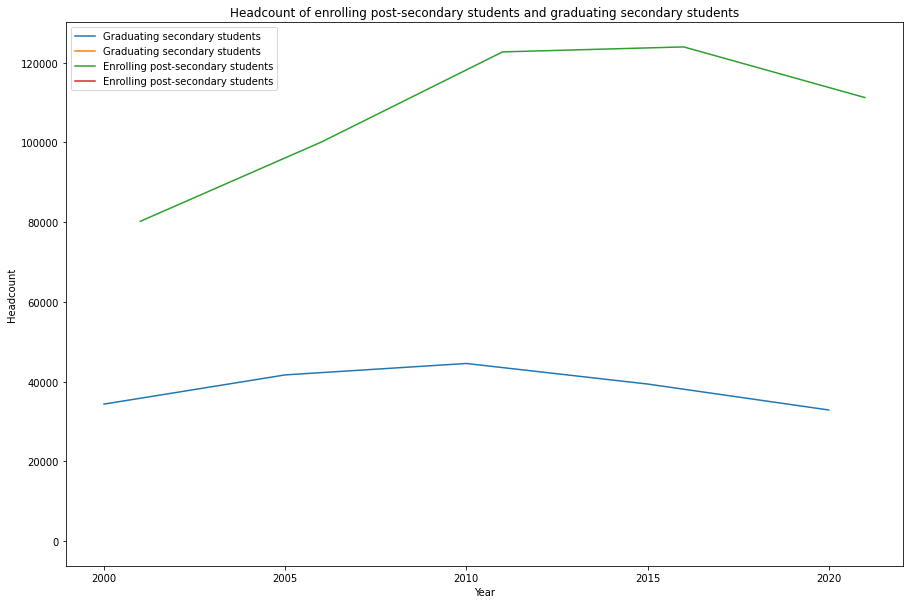

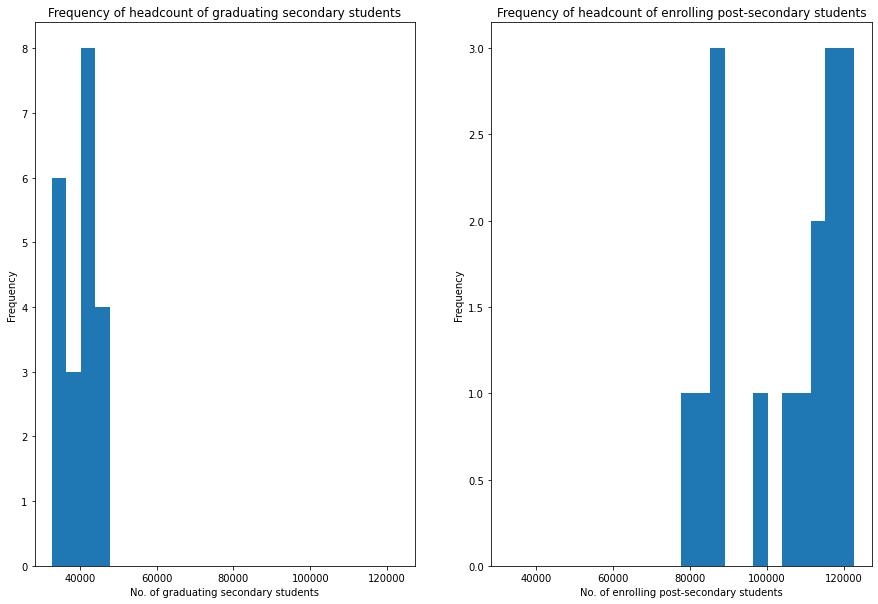

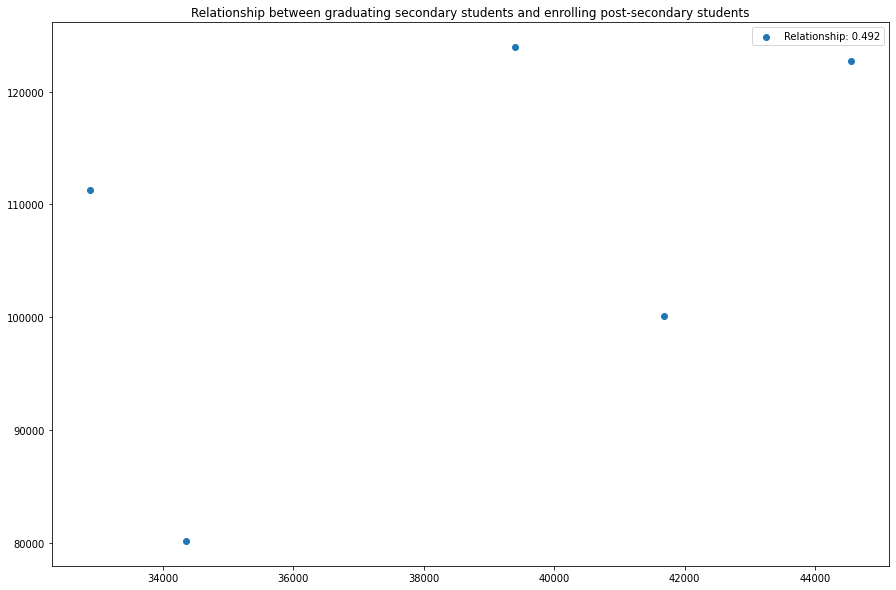

In [39]:
tempdata = filter5years(data[2])
tempdata2 = filter5years(data[3])
fig, ax = plt.subplots(figsize=(15, 10))
rec = [
    ax.plot(x_axis5, tempdata, 0.2, label='Graduating secondary students'),
    ax.plot(x_axis5 + 0.2, tempdata2, 0.2, label='Enrolling post-secondary students')]
ax.set_xticks(x_axis5, x5)
ax.set_xlabel('Year')
ax.set_ylabel('Headcount')
ax.set_title('Headcount of enrolling post-secondary students and graduating secondary students')
ax.legend()

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
n = 25
tempdata = np.array([data[2], data[3]]).flatten()
_bin = np.arange(min(tempdata), max(tempdata), (max(tempdata) - min(tempdata)) / n).tolist()
ax[0].hist(data[2], bins=_bin)
ax[1].hist(data[3],bins=_bin)
for i in range(2):
    ax[i].set_ylabel('Frequency')
ax[0].set_xlabel('No. of graduating secondary students')
ax[1].set_xlabel('No. of enrolling post-secondary students')
ax[0].set_title('Frequency of headcount of graduating secondary students')
ax[1].set_title('Frequency of headcount of enrolling post-secondary students')

tempdata = filter5years(data[2])
tempdata2 = filter5years(data[3])
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(tempdata, tempdata2, label=f'Relationship: {np.round(np.corrcoef(tempdata, tempdata2)[0][1], 3)}')
ax.set_title('Relationship between graduating secondary students and enrolling post-secondary students')
ax.legend()
print('*** Line Graph & Histogram & Scatterplot Graph ***')
print(' ** Graph for data[2] & data[3] (Sum of all filtered headcount of graduating secondary students) **')
print(' ** & (Sum of all filtered headcount of enrolling post-secondary students) **')
print('--------------------------------------------------------------------------------------------------')
print('-- Line graph shows that there is a larger number of enrolling post-secondary students')
print('   as compared to graduating secondary students')
print('--------------------------------------------------------------------------------------------------')
print('-- Histogram shows that the frequency of enrolling post-secondary students that resides around range of 80000 to 120000')
print('   as compared to the the frequency of graduated secondary students that resides around 40000')
print('-- From the line graph and histogram, 2 factors are assumed to contribute to this outcome:')
print('-- 1: Graduating secondary students discontinued their further studies')
print('-- 2: A number of enrolling post-secondary students might not come from graduating secondary students')
print('--------------------------------------------------------------------------------------------------')
print('-- Scatterplot graph shows a moderate correlation of 0.492')
print('-- This shows that over the years, enrolling post-secondary students and graduating secondary ')
print('   students are barely correlated, possibly due to increase in number of enrolling post-secondary students')
print('   as compared to the barely changed number of graduating secondary students')
plt.show()

*** Bar Graph & Line Graph & Scatterplot ***
 ** Graph for data[0] (Headcount of graduating secondary students) **
--------------------------------------------------------------------------------------------------
-- Bar Graph shows the number of graduating secondary students
-- Graph seems to show a relationship between graduating secondary students and enrolling post-secondary students
--------------------------------------------------------------------------------------------------
-- Scatterplot will be used to further investigate on the outcome of bar graph
-- All post-secondary except ITE (Graduating secondary & Enrolling post-secondary) has a good relation of -1 < 0.68 < 1
-- ITE (Graduating secondary & Enrolling post-secondary) has a opposite relation of -1 < -0.399 < 1
-- This shows that the growth of the number of graduating secondary students to go in ITE > 
   negative growth of the number of post-secondary students enrolling in ITE
-- Assumed factors to be:
-- 1: graduatin

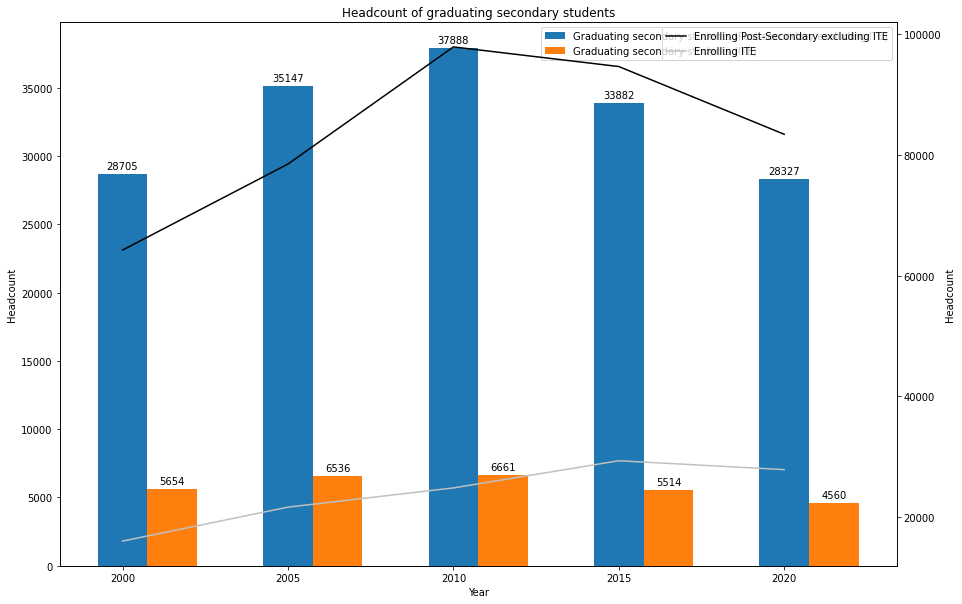

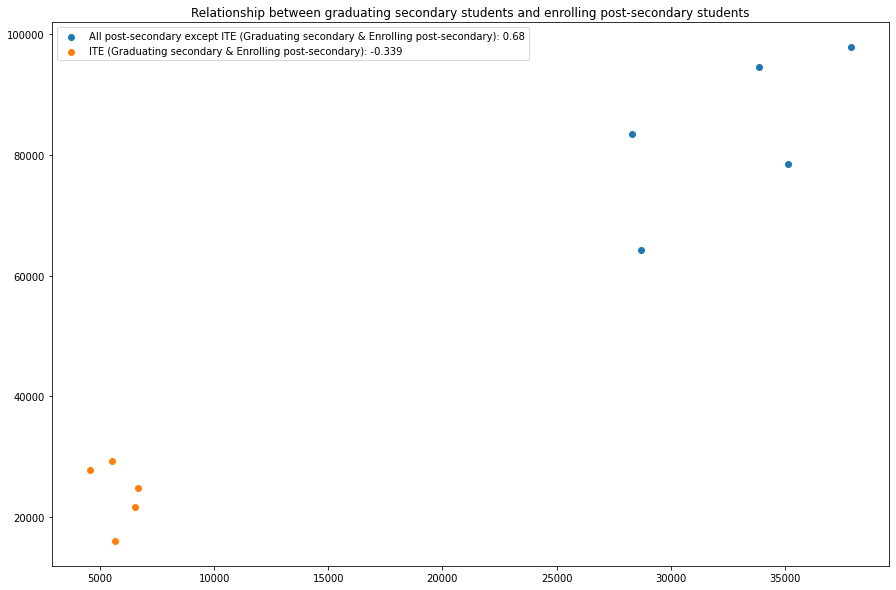

In [40]:
tempdata = filter5years(data[0])
tempdata2 = filter5years(data[5])
fig, ax = plt.subplots(figsize=(15, 10))
rec = [
    ax.bar(x_axis5, tempdata[0], 0.3, label='Graduating secondary students (Post-secondary excluding ITE)'),
    ax.bar(x_axis5 + 0.3, tempdata[1], 0.3, label='Graduating secondary students (ITE)')]
for elem in rec:
    ax.bar_label(elem, padding=3, fmt='%.0f')
ax.set_xticks(x_axis5, x5)
ax.set_xlabel('Year')
ax.set_ylabel('Headcount')
secax = ax.twinx()
secax.plot(tempdata2[0], label='Enrolling Post-Secondary excluding ITE', color='black')
secax.plot(tempdata2[1], label='Enrolling ITE', color='silver')
secax.set_ylabel('Headcount')
ax.set_title('Headcount of graduating secondary students')
ax.legend()
secax.legend()

fig, ax = plt.subplots(figsize=(15, 10))
rec = [
    ax.scatter(tempdata[0], tempdata2[0], label=f'All post-secondary except ITE (Graduating secondary & Enrolling post-secondary): {np.round(np.corrcoef(tempdata[0], tempdata2[0])[0][1], 3)}'),
    ax.scatter(tempdata[1], tempdata2[1], label=f'ITE (Graduating secondary & Enrolling post-secondary): {np.round(np.corrcoef(tempdata[1], tempdata2[1])[0][1], 3)}')]
ax.set_title('Relationship between graduating secondary students and enrolling post-secondary students')
ax.legend()
print('*** Bar Graph & Line Graph & Scatterplot ***')
print(' ** Graph for data[0] (Headcount of graduating secondary students) **')
print('--------------------------------------------------------------------------------------------------')
print('-- Bar Graph shows the number of graduating secondary students')
print('-- Graph seems to show a relationship between graduating secondary students and enrolling post-secondary students')
print('--------------------------------------------------------------------------------------------------')
print('-- Scatterplot will be used to further investigate on the outcome of bar graph')
print('-- All post-secondary except ITE (Graduating secondary & Enrolling post-secondary) has a good relation of -1 < 0.68 < 1')
print('-- ITE (Graduating secondary & Enrolling post-secondary) has a opposite relation of -1 < -0.399 < 1')
print('-- This shows that the growth of the number of graduating secondary students to go in ITE > ')
print('   negative growth of the number of post-secondary students enrolling in ITE')
print('-- Assumed factors to be:')
print('-- 1: graduating secondary students to go to ITE discontinued their further studies')
plt.show()

*** Bar Graph & Line Graph ***
 ** Graph for data[4] (Headcount of enrolling post-secondary students by route) **
--------------------------------------------------------------------------------------------------
-- Bar Graph shows the number of enrolling post-secondary students by category
-- Line Graph shows the total number of students that enrolled into post-secondary
--------------------------------------------------------------------------------------------------
-- Data below shows the percentage proportion of enrolling post-secondary students by category as a whole
Year:             2000    2005    2010    2015    2020
Polytechnics:   64.88%,  58.82%,  62.75%,  62.01%,  60.17%, 
Other Diploma:   0.00%,  3.43%,  3.28%,  2.65%,  3.18%, 
ITE:            19.92%,  21.58%,  20.20%,  23.63%,  25.01%, 
Junior College: 14.71%,  15.60%,  13.31%,  11.33%,  11.33%, 
Others:          0.49%,  0.56%,  0.47%,  0.38%,  0.31%, 


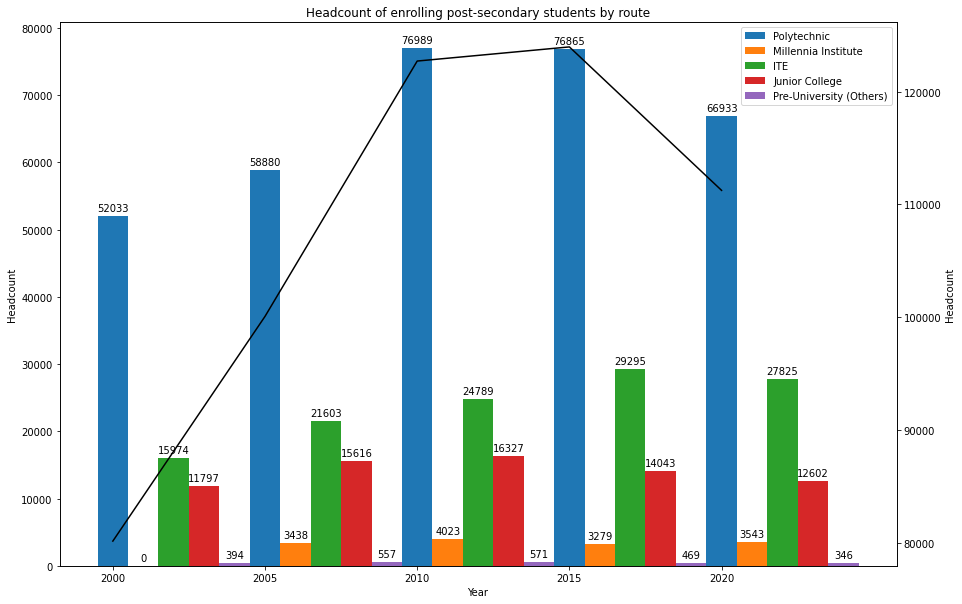

In [41]:
tempdata = filter5years(data[4])
fig, ax = plt.subplots(figsize=(15, 10))
rec = [
    ax.bar(x_axis5, tempdata[0], 0.2, label='Polytechnic'),
    ax.bar(x_axis5 + 0.2, tempdata[1], 0.2, label='Millennia Institute'),
    ax.bar(x_axis5 + 0.4, tempdata[2], 0.2, label='ITE'),
    ax.bar(x_axis5 + 0.6, tempdata[3], 0.2, label='Junior College'),
    ax.bar(x_axis5 + 0.8, tempdata[4], 0.2, label='Pre-University (Others)')]
for elem in rec:
    ax.bar_label(elem, padding=3, fmt='%.0f')
ax.set_xticks(x_axis5, x5)
secax = ax.twinx()
secax.plot(tempdata[5], label="Total headcount", color='black')
secax.set_ylabel('Headcount')
ax.set_xlabel('Year')
ax.set_ylabel('Headcount')
ax.set_title('Headcount of enrolling post-secondary students by route')
ax.legend()
print('*** Bar Graph & Line Graph ***')
print(
    ' ** Graph for data[4] (Headcount of enrolling post-secondary students by route) **')
print('--------------------------------------------------------------------------------------------------')
print('-- Bar Graph shows the number of enrolling post-secondary students by category')
print('-- Line Graph shows the total number of students that enrolled into post-secondary')
print('--------------------------------------------------------------------------------------------------')
print('-- Data below shows the percentage proportion of enrolling post-secondary students by category as a whole')
print('Year:             2000    2005    2010    2015    2020')
_list = ['Polytechnics:  ', 'Other Diploma:  ',
         'ITE:           ', 'Junior College:', 'Others:         ']
for i in range(len(tempdata) - 1):
    print(_list[i], end='')
    for j in range(len(x5)):
        print(f' {tempdata[i][j] / tempdata[5][j] * 100:.2f}%, ', end='')
    print('')
plt.show()


*** Boxplot ***
 ** Graph for data[1] (Polytechnic Only) **
--------------------------------------------------------------------------------------------------
-- Graph shows that the number of enrolling post-secondary students going into Polytechnics seems consistant amongst:
-- [Singapore Polytechnic, Ngee Ann Polytechnic, Temasek Polytechnic, Nanyang Polytechnic
-- Nanyang Polytechnic having one outliners, throughout the duration, one year had a significantly lower intake of enrolling post-secondary students
-- Republic Polytechnic has a much wider range due to the opening for intake at a later year
-- Republic Polytechnic data throughout the years: [0, 0, 0, 821, 1907, 3587, 5479, 8087, 10188, 12179, 13003, 13927, 14520, 14995, 14952, 14690, 13915, 13566, 13142, 12627, 12225]


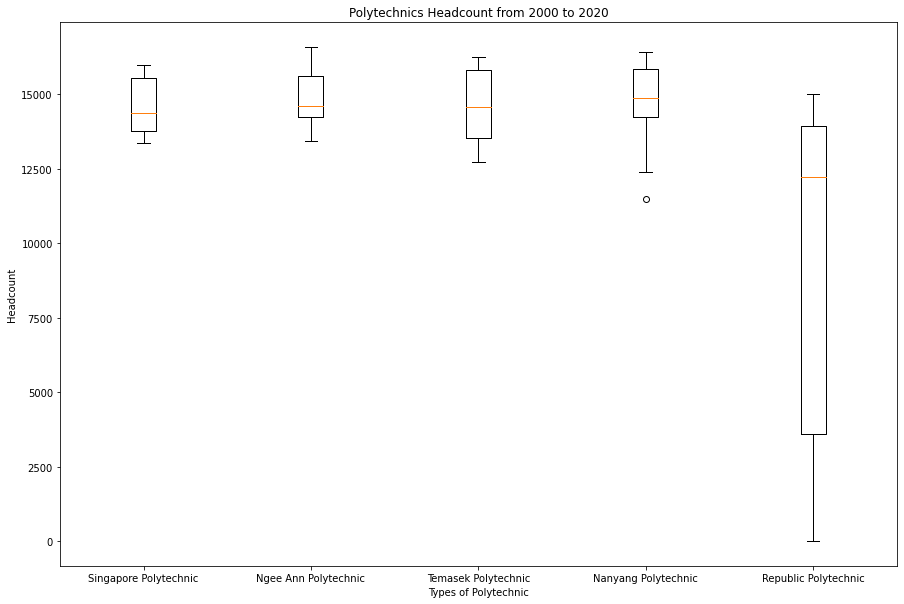

In [42]:
fig, ax = plt.subplots(figsize=(15, 10))
rec = []
for i in range(5):
    rec.append(ax.boxplot(data[1][i], positions=[i]))
ax.set_xticks([0, 1, 2, 3, 4], ['Singapore Polytechnic', 'Ngee Ann Polytechnic', 'Temasek Polytechnic', 'Nanyang Polytechnic', 'Republic Polytechnic'])
ax.set_xlabel('Types of Polytechnic')
ax.set_ylabel('Headcount')
ax.set_title('Polytechnics Headcount from 2000 to 2020')
print('*** Boxplot ***')
print(' ** Graph for data[1] (Polytechnic Only) **')
print('--------------------------------------------------------------------------------------------------')
print('-- Graph shows that the number of enrolling post-secondary students going into Polytechnics seems consistant amongst:')
print('-- [Singapore Polytechnic, Ngee Ann Polytechnic, Temasek Polytechnic, Nanyang Polytechnic')
print('-- Nanyang Polytechnic having one outliners, throughout the duration, one year had a significantly lower intake of enrolling post-secondary students')
print('-- Republic Polytechnic has a much wider range due to the opening for intake at a later year')
print(f'-- Republic Polytechnic data throughout the years: {data[1][4]}')